#Step 1: Download and Load the MNIST Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

# Define a transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Show a sample image
plt.imshow(trainset.data[0], cmap='gray')
plt.title(f'Label: {trainset.targets[0]}')
plt.show()

#Step 2: Build a Convolutional Neural Network (CNN) Model

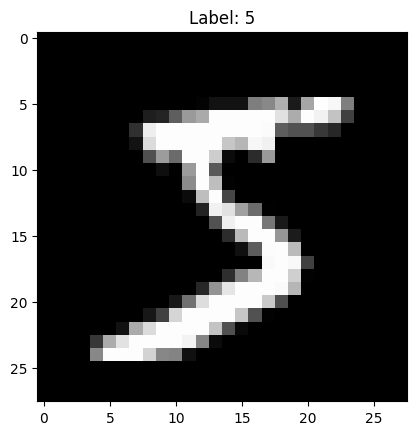

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8687 - loss: 0.9420 - val_accuracy: 0.9767 - val_loss: 0.0729
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9792 - loss: 0.0702 - val_accuracy: 0.9830 - val_loss: 0.0558
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9840 - loss: 0.0497 - val_accuracy: 0.9829 - val_loss: 0.0557
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9867 - loss: 0.0432 - val_accuracy: 0.9823 - val_loss: 0.0566
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.9869 - val_loss: 0.0418


In [ ]:
# It is recommended to use trainset[i][0] for image and trainset[i][1] for label in a loop for more robust code.
train_images = trainset.data.numpy()  # Convert to NumPy array for Keras
train_labels = trainset.targets.numpy()
test_images = testset.data.numpy()
test_labels = testset.targets.numpy()

# Reshape images to have a single channel (grayscale)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Build the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

#Step 3: Evaluate the Model

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9857 - loss: 0.0481
Test Loss: 0.0418
Test accuracy: 98.69%
